# Course 8 Lab 3 - Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [4]:
# import modules
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [2]:
# get the xlsx file we are working with from a url
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
df_can = pd.read_excel(
    URL,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\sspal\AppData\Local\Temp\ipykernel_12836\3015018611.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


### Pie Charts

In [7]:
# group contries by continents and apply sum function
df_continents = df_can.groupby('Continent', axis = 0).sum()
print(type(df_can.groupby('Continent', axis = 0)))
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


 Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

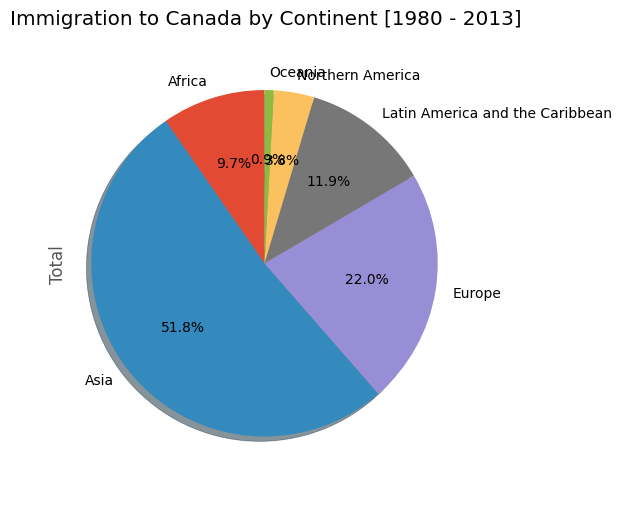

In [8]:
#autopct create %, start angle represents starting point
df_continents['Total'].plot(kind = 'pie',figsize = (5,6), autopct = '%1.1f%%',startangle = 90, shadow = True)
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

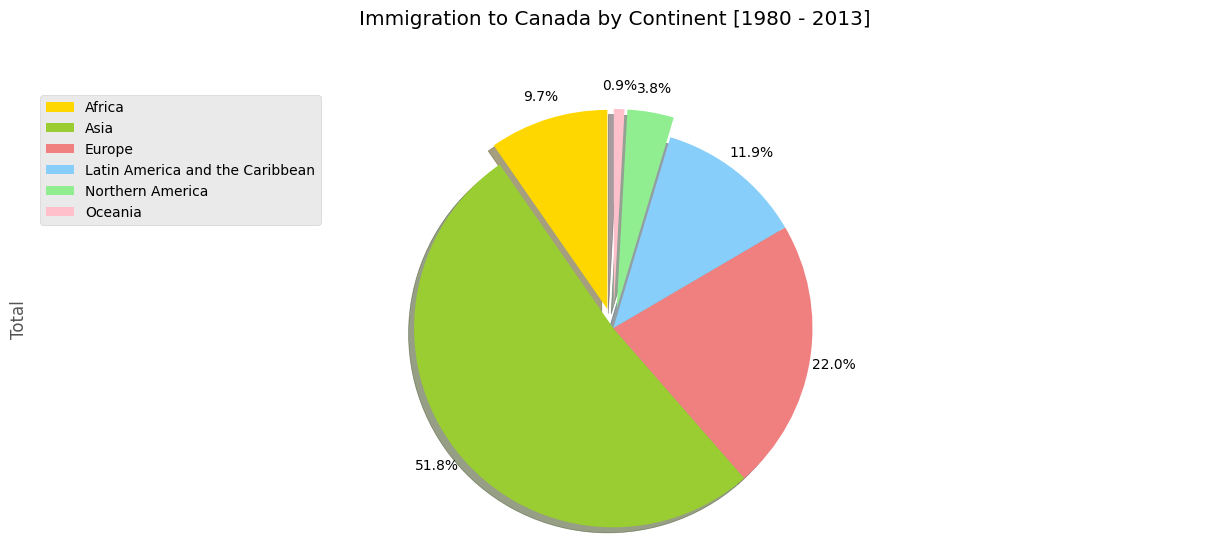

In [9]:
# Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
# Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
# Pass in a custom set of colors for continents by passing in colors parameter.
# Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in explode parameter.
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

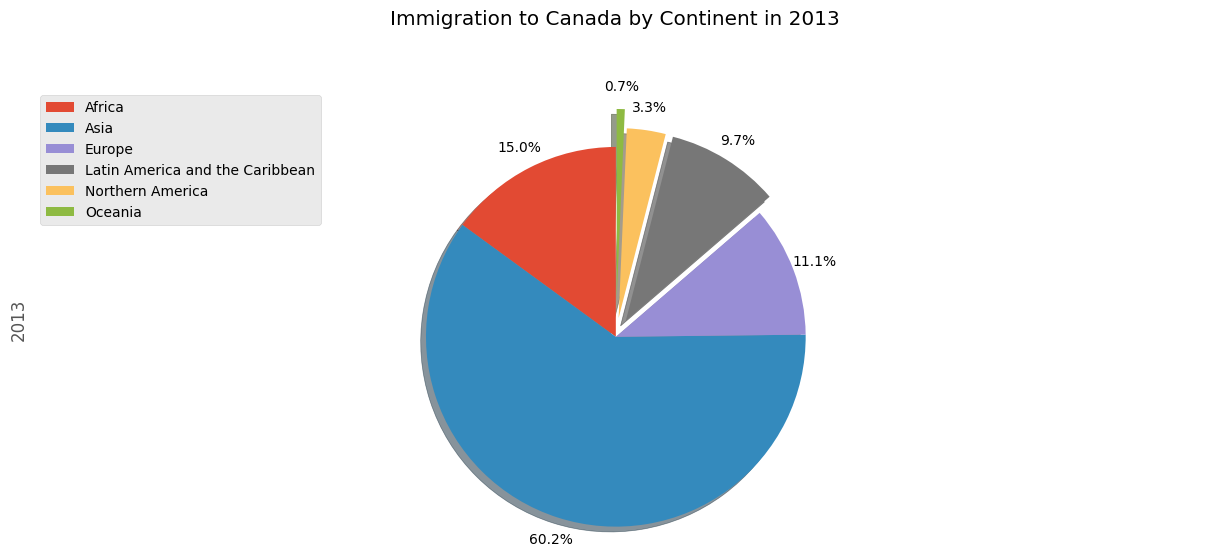

In [12]:
# Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()


### Box Plots

In [13]:
# Let's plot the box plot for the Japanese immigrants between 1980 - 2013.
# obtain a dataframe
df_japan = df_can.loc[['Japan'],years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


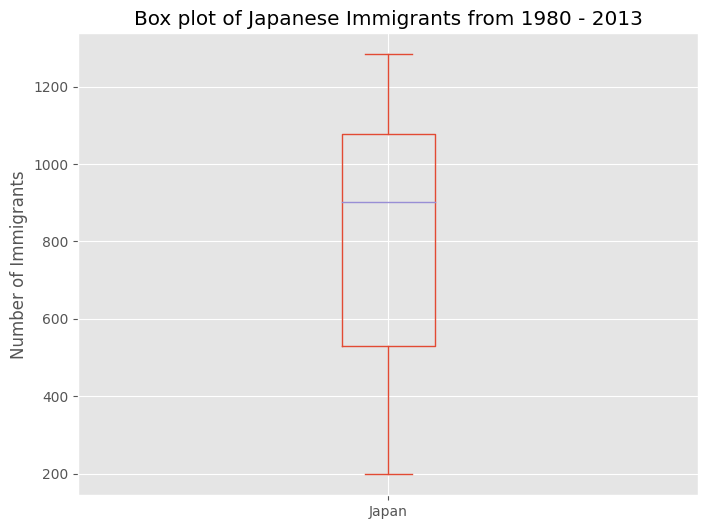

In [14]:
# plot
df_japan.plot(kind = 'box', figsize = (8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [15]:
# view the actual numbers with the describe function
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [16]:
# Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.
df_IndiaChina = df_can.loc[['India','China'],years].transpose()
df_IndiaChina.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


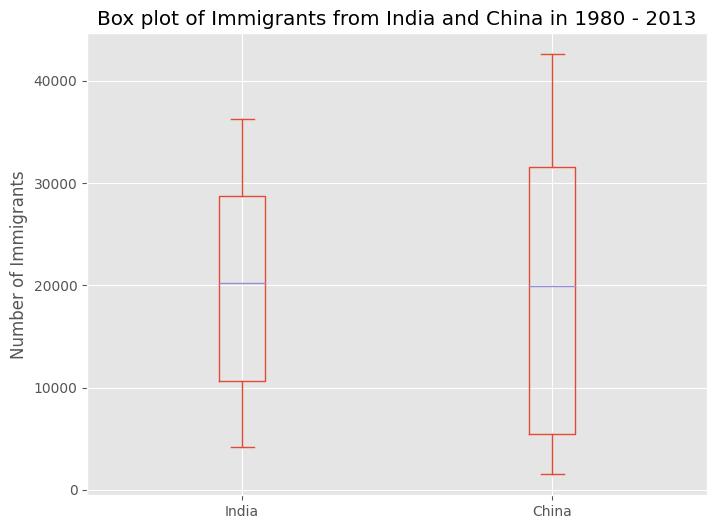

In [17]:
# plot
df_IndiaChina.plot(kind = 'box', figsize = (8,6))
plt.title('Box plot of Immigrants from India and China in 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [18]:
# see the actual numbers
df_IndiaChina.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


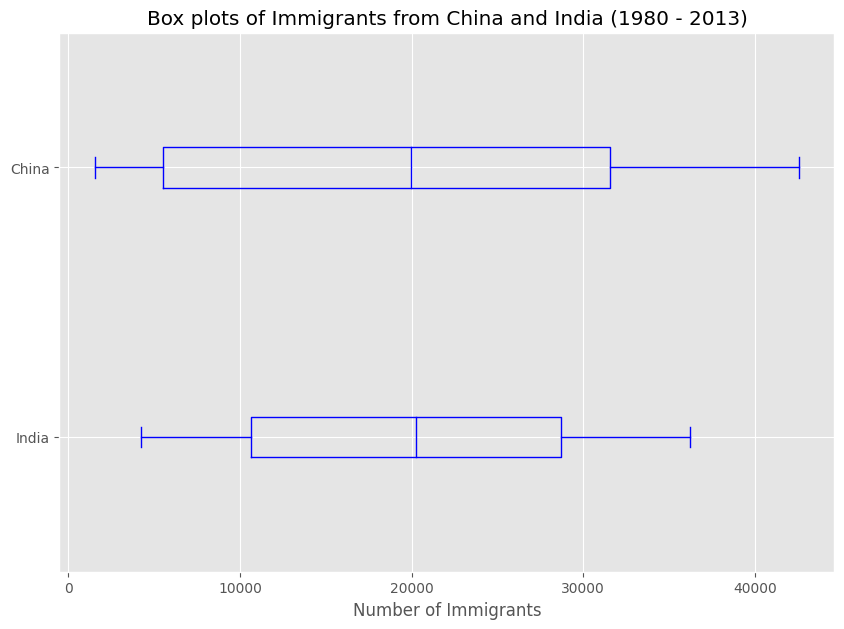

In [20]:
# horizontal box plots
df_IndiaChina.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

### Subplots

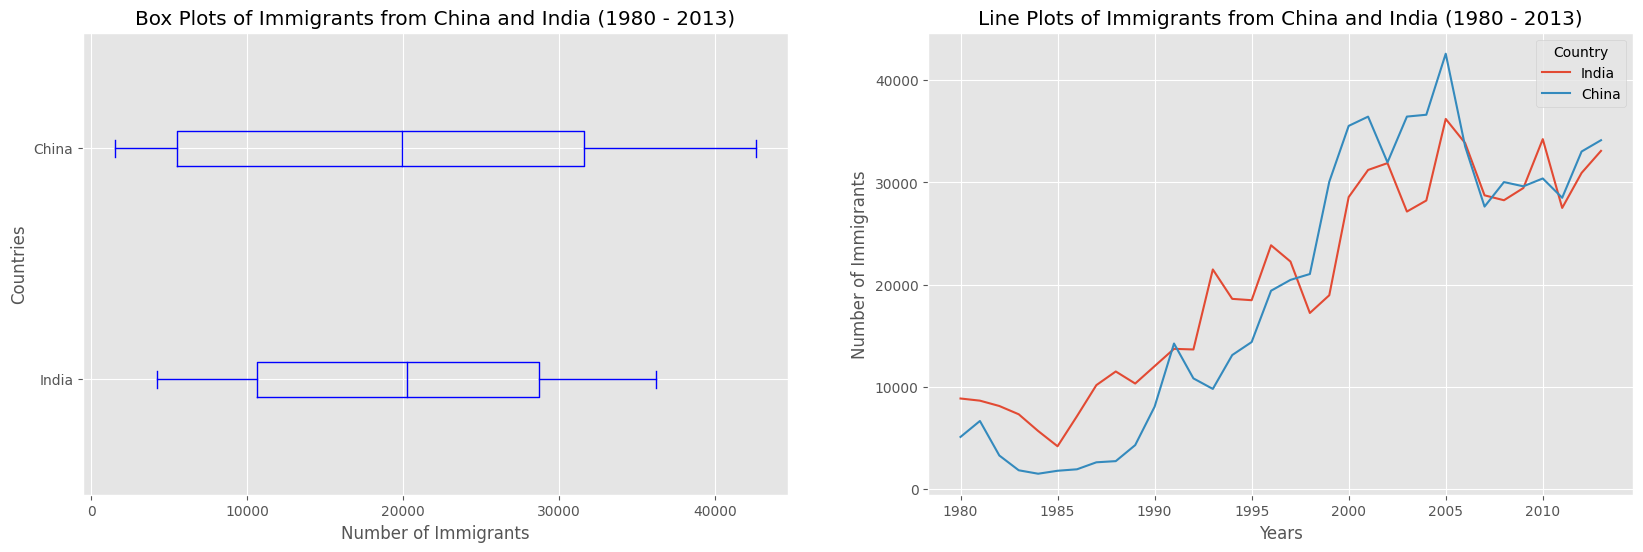

In [21]:
# create figure
fig = plt.figure() 
# add subplot 1 (1 row, 2 columns, first plot)
ax0 = fig.add_subplot(1, 2, 1) 
# add subplot 2 (1 row, 2 columns, second plot). 
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
df_IndiaChina.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_IndiaChina.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [31]:
# Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.
# Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.
# get the data for the top 15 countries
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [33]:
# Create a new dataframe which contains the aggregate for each decade
# Create a list of all years in decades 80's, 90's, and 00's.
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 
# Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)
# Merge the three series into a new data frame. Call your dataframe new_df.
new_df = pd.DataFrame({'1980s':df_80s, '1990s':df_90s, '2000s':df_00s})
# display the dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [34]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


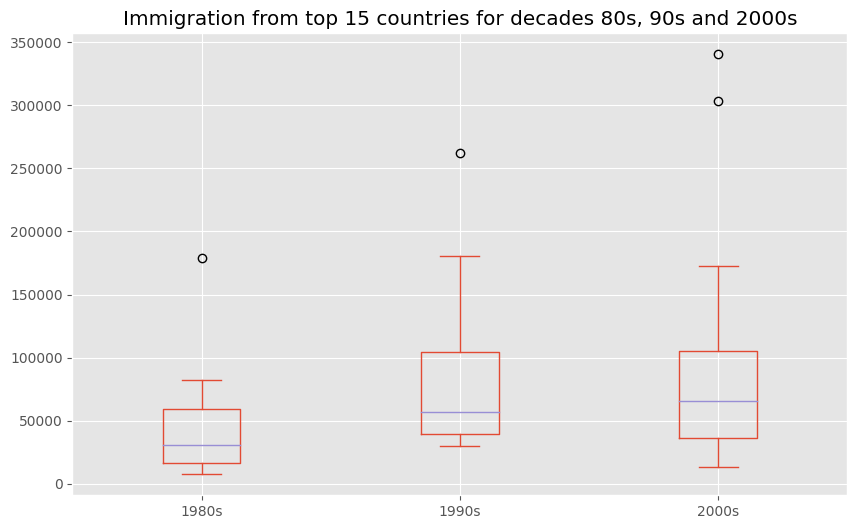

In [35]:
# plot the box plot
new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

In [36]:
# check the number of entries that fall outside the outlier threshold
# Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.
# Outlier > 105,505.5 + (1.5 * 69,404)
# Outlier > 209,611.5
new_df = new_df.reset_index()
new_df[new_df['2000s']>209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


### Scatter Plots

In [38]:
# visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.
# Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.
# get total pop per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
#change the years to type int
df_tot.index = map(int,df_tot.index)
# resent the index to put it back in as a column in the dataframe
df_tot.reset_index(inplace = True)
# rename columns
df_tot.columns = ['year', 'total']
# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


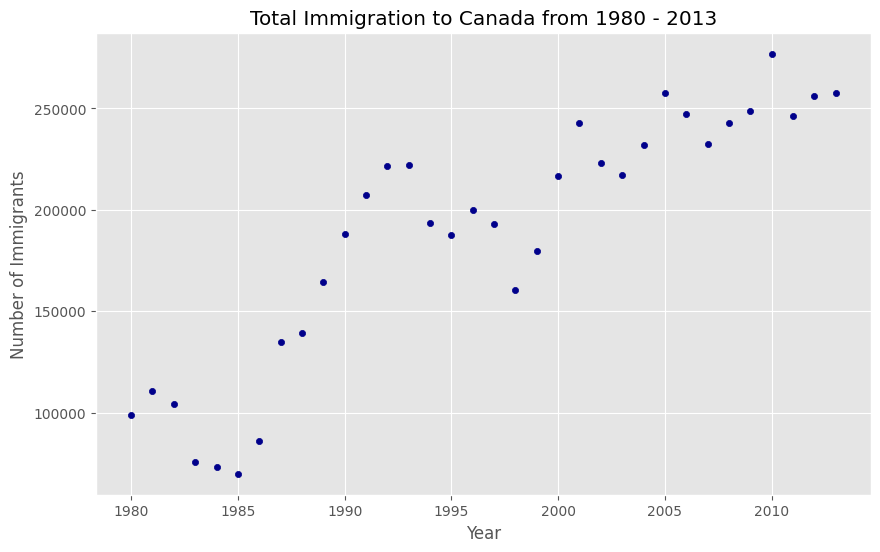

In [39]:
# plot the data
df_tot.plot(kind = 'scatter', x ='year', y = 'total', figsize = (10,6), color = 'darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [40]:
# get the equation of the line of best fit
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x,y,deg =1) # degree of fit 1 linear, 2 quadratic
fit

array([ 5.56709228e+03, -1.09261952e+07])

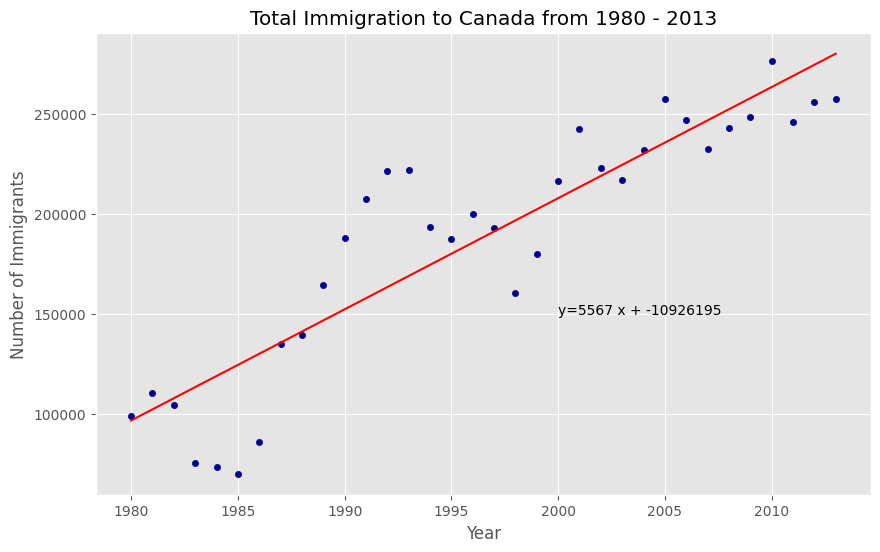

'No. Immigrants = 5567 * Year + -10926195'

In [41]:
# plot the regression line on the scatter plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
# plot the line of best fit
plt.plot(x,fit[0]*x+fit[1], color = 'red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]),xy=(2000,150000))
plt.show()
# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [42]:
# Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?
# Get the data:
# Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
df_countries = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
# Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
df_total = pd.DataFrame(df_countries.sum(axis=1))
# Reset the index in place.
df_total.reset_index(inplace = True)
# Rename the columns to year and total.
df_total.columns = ['year','total']
df_total['year'] = df_total['year'].astype(int)
# Display the resulting dataframe.
df_total.head()


,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


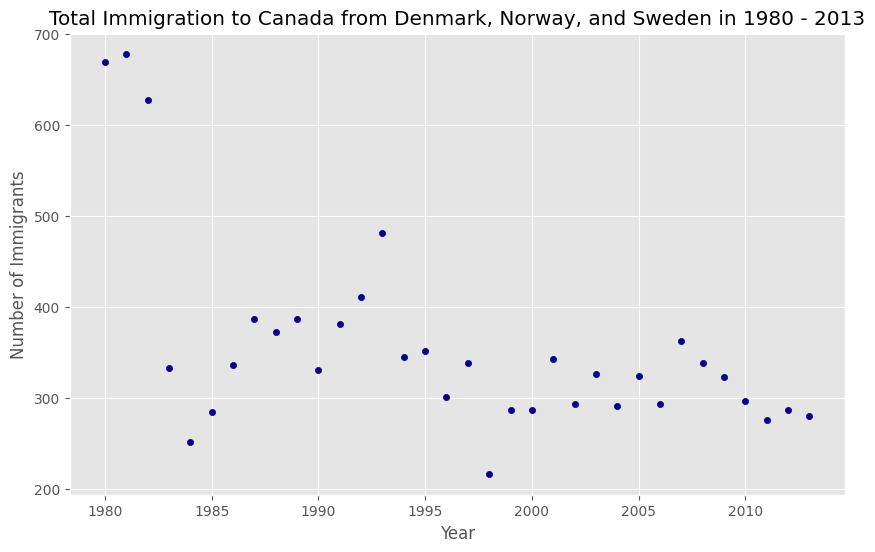

In [43]:
# Generate the scatter plot by plotting the total versus year in df_total.
df_total.plot(kind = 'scatter', x ='year', y = 'total', figsize = (10,6), color = 'darkblue')
plt.title('Total Immigration to Canada from Denmark, Norway, and Sweden in 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### Bubble Plots

In [44]:
# compare Argentina's immigration to that of it's neighbour Brazil
# Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and include it in the dataframe.
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Palau,Marshall Islands,Western Sahara,San Marino,New Caledonia,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,1,0,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [45]:
# Create the normalized weights
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

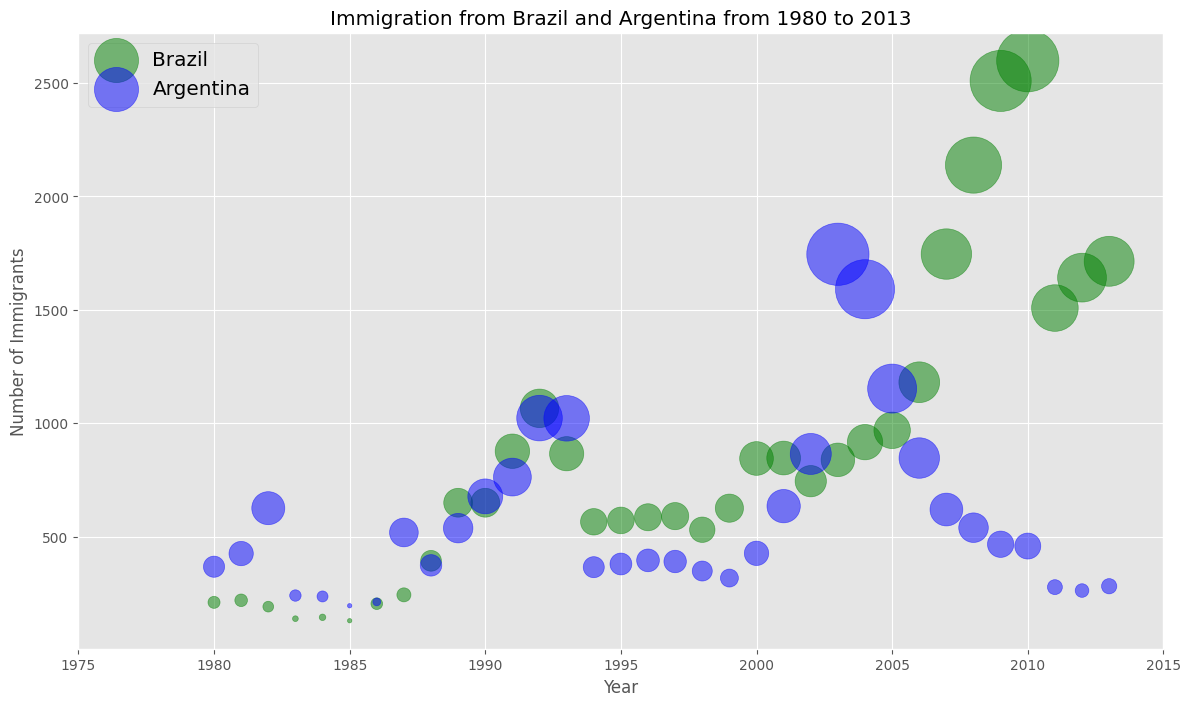

In [46]:
# Plot the data.
# To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.
# We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
# multiply weights by 2000 to scale it up on the graph, and,
# add 10 to compensate for the min value (which has a 0 weight and therefore scale with×2000).
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [47]:
# Question: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.
# Normalize the data pertaining to China and India.
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

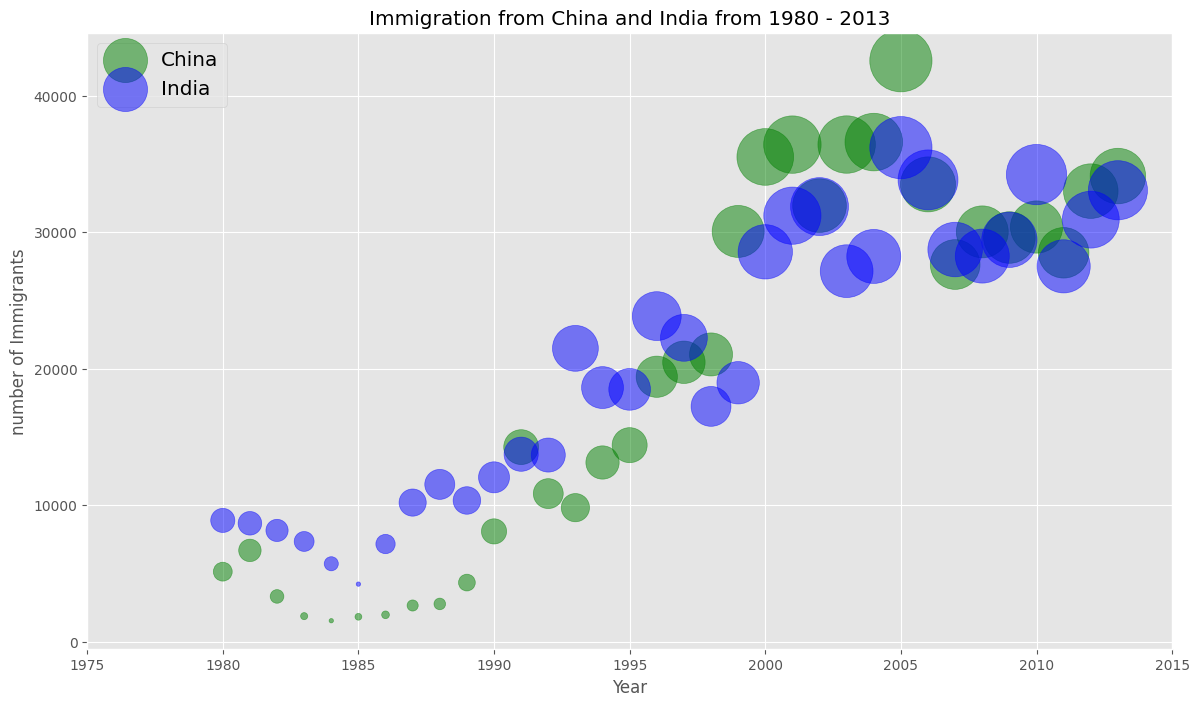

In [48]:
# generate the bubble plots
# china
ax0 = df_can_t.plot(kind = 'scatter', x = 'Year', y = 'China', figsize = (14,8), alpha = 0.5, color = 'green', s = norm_china*2000+10, xlim = (1975,2015))
# india
ax1 = df_can_t.plot(kind = 'scatter', x = 'Year', y = 'India', alpha = 0.5, color = 'blue', s = norm_india*2000+10, ax = ax0)

ax0.set_ylabel("number of Immigrants")
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')
